<a href="https://colab.research.google.com/github/cihan38/Time-Series-Part-1/blob/master/time_series_analysis_part_I_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series-Forecasting Part 1

Hey there!
How is it going everybody!

In this section, I want to talk about time series analysis. I will break this tutorial into three sections. In the first section, I will demonstrate the basic and key features of time series modeling. In the second part, I will go through a more detailed explanation of time series modeling such as autoregressive (AR), integrated (I), moving average (MA), white noise, and random walk. In the last section, I will illustrate time series modeling with a machine learning (or recurrent neural network) approach.

Let’s get started.




# Introduction

# What is time series?

Time series forecasting is commonly used to analyze business data. It helps us to illustrate trends (or growth patterns) in the data. With time series analysis, a series of data points are examined with respect to temporal ordering. This technique enables us to do future predictions and forecasting. Specifically, we can estimate growth of a business such as sales, users/customers, and stock prices. 

I think a good illustration of this technique would be an examination of stock prices. 

Let’s take a look at Disney’s stock. 

Before we proceed, please be aware that this tutorial is for informational and educational purposes only and should not be taken as financial/investment or business advice. You should not rely on this information to make financial decisions as there are various factors not included in this tutorial which may positively or negatively affect stock prices. 

To download the data, navigate to the following link: https://finance.yahoo.com/quote/DIS/history?p=DIS&.tsrc=fin-srch.  This site allows you to download historical stock prices for various companies.  In this tutorial, we examine 5 years of Disney stock prices from 2015 to 2020.  I downloaded and saved the data on my desktop in .cvs format.

Next, upload the file from your desktop to Colab. You will see a file image in the upper lefthand corner of your screen. Click on the file image option, select "Upload," locate your file, and click ok.


# Pandas


This is a very important tool in Python, especially for data scientists.  Pandas data frame is amazing at storing data into columns and rows. We can easily modify the data (i.e, identify, rename, add or delete rows or columns, or resample the data) and make it ready for any type of analyses, including time series analysis.

Upon uploading the file into Colab, we can run Pandas library to read the file. 
After reading the file in Pandas, you can see the first 5 rows and all 7 columns of the data. The columns include: 'Date,' 'Open,' 'High,' 'Low,' 'Close,' 'Adj Close,' and 'Volume.'

  

In [0]:
import pandas as pd 
df = pd.read_csv('/content/DIS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-30,92.500000,92.940002,90.830002,90.959999,84.775940,10212300
1,2015-02-02,91.300003,92.050003,90.059998,91.930000,85.679993,9392000
2,2015-02-03,92.430000,94.110001,92.190002,94.099998,87.702461,12329100
3,2015-02-04,99.389999,101.940002,98.820000,101.279999,94.394302,32640500
4,2015-02-05,100.760002,102.839996,100.510002,102.639999,95.661842,14089500


# Date/Time

Let’s check the time stamp for the date variable (which is in string/str format).
Let’s change str to a datetime format so as to easily obtain summary statistics.


In [0]:
type(df.Date[0])

str

Now it is in a datetime format.

In [0]:
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-30,92.500000,92.940002,90.830002,90.959999,84.775940,10212300
1,2015-02-02,91.300003,92.050003,90.059998,91.930000,85.679993,9392000
2,2015-02-03,92.430000,94.110001,92.190002,94.099998,87.702461,12329100
3,2015-02-04,99.389999,101.940002,98.820000,101.279999,94.394302,32640500
4,2015-02-05,100.760002,102.839996,100.510002,102.639999,95.661842,14089500


In [0]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Let’s see the minimum date in the data. It is 2015-01-30.


In [0]:
df.Date.min()

Timestamp('2015-01-30 00:00:00')

# Adding Year and Quarter Columns 
 We use "dt' dunctions to do this transformation.

In [0]:
df['Year'] = df.Date.dt.year
df['Quarter'] = df.Date.dt.quarter
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter
0,2015-01-30,92.500000,92.940002,90.830002,90.959999,84.775940,10212300,2015,1
1,2015-02-02,91.300003,92.050003,90.059998,91.930000,85.679993,9392000,2015,1
2,2015-02-03,92.430000,94.110001,92.190002,94.099998,87.702461,12329100,2015,1
3,2015-02-04,99.389999,101.940002,98.820000,101.279999,94.394302,32640500,2015,1
4,2015-02-05,100.760002,102.839996,100.510002,102.639999,95.661842,14089500,2015,1


# Visualization

Let’s visualize the "Close" column (or closing price) in the data with the plot function. Plotting this information displays daily pricing patterns and stock prices as going up and down over time. The overall trend, however, is an upside trend. 

What we need to do now is to address seasonality (up and downs over time), trend (or overall direction of stock price), and irregularity (or day to day changes or random changes) in the data.  
 

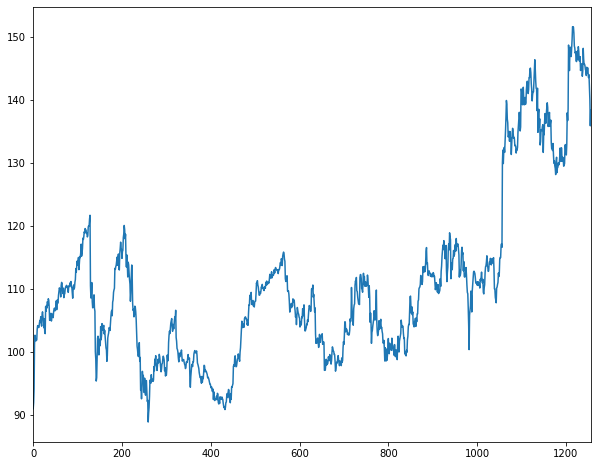

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(10,8))
df.Close.plot()


# From daily to quarterly patterns 

It may be easier for us to summarize daily patterns into quarterly patterns so as to illustrate the time series on fewer data points (quarterly vs daily or weekly patterns). You can also try daily, weekly, or monthly patterns. 

I grouped the data by Year and Quarter with respect to the average closing price. I also reset the index.



In [0]:
df1 = df.groupby(['Year', 'Quarter']).Close.mean().reset_index()
df1

,Year,Quarter,Close
0,2015,1,104.003810
1,2015,2,109.816349
2,2015,3,108.892188
3,2015,4,111.452343
4,2016,1,96.539509
5,2016,2,100.006875
6,2016,3,95.756250
7,2016,4,97.501905
8,2017,1,110.104839
9,2017,2,109.502699


# The visualization of the quarterly patterns. 

As we see in the data above, we have 21 quarters over 5 years. The patterns here are actually very similar to the plot showing daily pricing patterns (see above).  

([<matplotlib.axis.XTick at 0x7f4de11ebc88>,
 <a list of 21 Text xticklabel objects>)

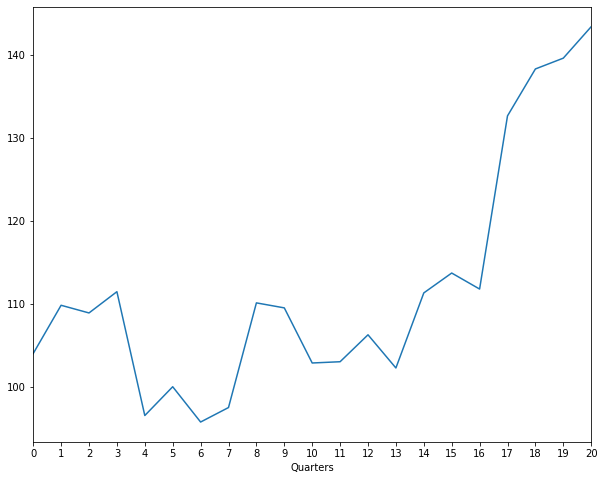

In [0]:
plt.figure(figsize=(10,8))
df1.Close.plot()

plt.xlabel('Quarters')

plt.xticks(np.arange(0, 21, step=1))


# Moving average / adding QMA column and shifting the data

Let’s calculate the rolling/moving average (mean) for the 'Close' column. This new column represents the quarterly moving average and is labeled as 'QMA' in the data. The goal here is to smooth and reduce the effects of irregularities on the data. We want to flatten out the data. We can average the data for the first 4 numbers from 1 through 4 in 2015 (for quarterly moving averages). We can repeat this for the next 4 numbers (quarters 2 through 4 from 2015 and 1 from 2016). Each computation averages the 4 closing prices.  

Next, we shift the 'QMA' column in the data frame because each value in 'QMA' is an average of 4 values. If we look at the last value in the 'QMA' column, it does not capture the last 4 numbers/quarters.  In other words, we cannot have an average value for the quarters 3 and 4 from 2019 and the 1st quarter from 2020 because this amounts to only 3 quarters and not 4.


In [0]:
df1['QMA'] = df1.Close.rolling(window=4).mean().shift(-1)
df1

,Year,Quarter,Close,QMA
0,2015,1,104.003810,NaN
1,2015,2,109.816349,NaN
2,2015,3,108.892188,108.541172
3,2015,4,111.452343,106.675097
4,2016,1,96.539509,104.222728
5,2016,2,100.006875,100.938744
6,2016,3,95.756250,97.451135
7,2016,4,97.501905,100.842467
8,2017,1,110.104839,103.216423
9,2017,2,109.502699,104.994027


# Centralizing the quarterly moving average / adding 'CQMA’ column

Now we can centralize the quarterly moving average to make it smoother in the data. This is because we averaged an uneven number of quarterly data in the 'QMA' column calculation above. In reality, each moving average for the 'Close' column does fall into the middle of the two rows in the 'QMA' column. We have to place a value in a row because Python (or Pandas) does not let us to place the value in between the rows. Thus, this would create an uneven distribution of values in 'QMA.' To make the 'QMA' evenly distributed, we need to create a new column labeled as 'CQMA’ (which stands for centered 'QMA'). 'CQMA' is calculated by using the moving average of 2 values in 'QMA' so that the 'CQMA' column will be evenly distributed. Basically, we calculated the moving average (for 4 values) of the moving average (for 2 values).

In [0]:
df1['CQMA'] = df1.QMA.rolling(window=2).mean().shift(-1)
df1

,Year,Quarter,Close,QMA,CQMA
0,2015,1,104.003810,NaN,NaN
1,2015,2,109.816349,NaN,NaN
2,2015,3,108.892188,108.541172,107.608135
3,2015,4,111.452343,106.675097,105.448913
4,2016,1,96.539509,104.222728,102.580736
5,2016,2,100.006875,100.938744,99.194939
6,2016,3,95.756250,97.451135,99.146801
7,2016,4,97.501905,100.842467,102.029445
8,2017,1,110.104839,103.216423,104.105225
9,2017,2,109.502699,104.994027,105.683571


# Visualize the Close and CQMA columns

Let’s create the plot for 'CQMA' and 'Close' columns.  As we can see here, the blue line represents the 'Close' column and yellow represents 'CQMA.' From this plot, we can see that we successfully smoothed out the quarterly closing prices.  Again, our goal up to this point was to minimize the effects of seasonality and irregularity of the data.

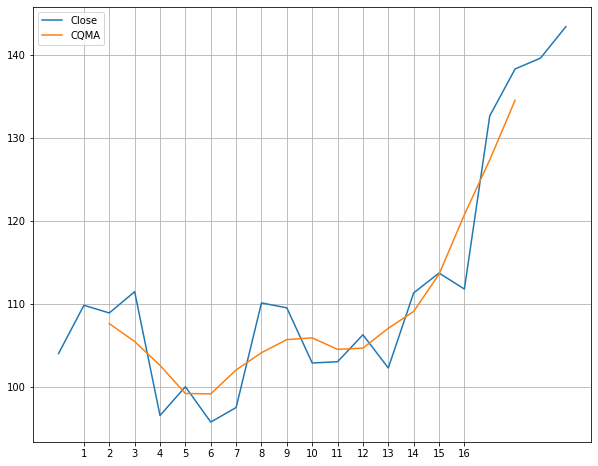

In [0]:
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(df1['Close'], label = 'Close')
plt.plot(df1['CQMA'], label = 'CQMA' )
plt.xticks(np.arange(1, 17, step=1))
plt.legend(loc=2)



# Taking out the seasonality and irregular components /adding 'SC_I' column

After smoothing the time series, we examine the difference between the 'CQMA' and 'Close' columns. This helps us to learn how far off we are from each data point with respect to 'CQMA.' We should be able to find the difference between the original data points and the smoothed data (i.e., the data without irregularity and seasonality). This will help us to learn the difference and how to forecast based on this difference. This will also help us to calculate the seasonality and irregularity of the data.

To construct a classical time series model, we need to have knowledge on seasonality of, irregularity, and trends in the data. 
Let’s first calculate the seasonality and irregularity part using a new column labeled as 'SC_I. '  This column was calculated by dividing the closing price by 'CQMA.'



In [0]:
df1['SC_I'] = df1['Close']/df1['CQMA']
df1

,Year,Quarter,Close,QMA,CQMA,SC_I
0,2015,1,104.003810,NaN,NaN,NaN
1,2015,2,109.816349,NaN,NaN,NaN
2,2015,3,108.892188,108.541172,107.608135,1.011933
3,2015,4,111.452343,106.675097,105.448913,1.056932
4,2016,1,96.539509,104.222728,102.580736,0.941108
5,2016,2,100.006875,100.938744,99.194939,1.008185
6,2016,3,95.756250,97.451135,99.146801,0.965803
7,2016,4,97.501905,100.842467,102.029445,0.955625
8,2017,1,110.104839,103.216423,104.105225,1.057630
9,2017,2,109.502699,104.994027,105.683571,1.036137


# Adding seasonality -'SC' column

To create the seasonality column ('SC'), we will average each quarter within 'SC_I.'  

In [0]:
SC= df1.groupby('Quarter', as_index=False)['SC_I'].mean()
SC

,Quarter,SC_I
0,1,0.984981
1,2,1.010311
2,3,0.999525
3,4,0.999894


In [0]:
SC= pd.concat([SC]*5, ignore_index=True)
SC

,Quarter,SC_I
0,1,0.984981
1,2,1.010311
2,3,0.999525
3,4,0.999894
4,1,0.984981
5,2,1.010311
6,3,0.999525
7,4,0.999894
8,1,0.984981
9,2,1.010311


# Renaming the column

I rename the 'SC_I' column as 'SC' so as to merge the two datasets.   

In [0]:
SC = SC.rename(columns={'SC_I': 'SC'})


# Merge

In [0]:
df4= pd.merge(df1, SC, left_on='Quarter', right_index=True)
df4

,Quarter,Year,Quarter_x,Close,QMA,CQMA,SC_I,Quarter_y,SC
0,1,2015,1,104.003810,NaN,NaN,NaN,2,1.010311
4,1,2016,1,96.539509,104.222728,102.580736,0.941108,2,1.010311
8,1,2017,1,110.104839,103.216423,104.105225,1.057630,2,1.010311
12,1,2018,1,106.261476,103.603044,104.657786,1.015323,2,1.010311
16,1,2019,1,111.770492,117.348933,120.720193,0.925864,2,1.010311
20,1,2020,1,143.364735,NaN,NaN,NaN,2,1.010311
1,2,2015,2,109.816349,NaN,NaN,NaN,3,0.999525
5,2,2016,2,100.006875,100.938744,99.194939,1.008185,3,0.999525
9,2,2017,2,109.502699,104.994027,105.683571,1.036137,3,0.999525
13,2,2018,2,102.265781,105.712529,107.047588,0.955330,3,0.999525


# Sorting index

In [0]:
df4.sort_index(inplace=True)
df4

,Quarter,Year,Quarter_x,Close,QMA,CQMA,SC_I,Quarter_y,SC
0,1,2015,1,104.003810,NaN,NaN,NaN,2,1.010311
1,2,2015,2,109.816349,NaN,NaN,NaN,3,0.999525
2,3,2015,3,108.892188,108.541172,107.608135,1.011933,4,0.999894
3,4,2015,4,111.452343,106.675097,105.448913,1.056932,1,0.984981
4,1,2016,1,96.539509,104.222728,102.580736,0.941108,2,1.010311
5,2,2016,2,100.006875,100.938744,99.194939,1.008185,3,0.999525
6,3,2016,3,95.756250,97.451135,99.146801,0.965803,4,0.999894
7,4,2016,4,97.501905,100.842467,102.029445,0.955625,1,0.984981
8,1,2017,1,110.104839,103.216423,104.105225,1.057630,2,1.010311
9,2,2017,2,109.502699,104.994027,105.683571,1.036137,3,0.999525


# Column deletion

Delete the redundant columns.


In [0]:
del df4['Quarter_x']
del df4['Quarter_y']


# De-seasonalize the data


We divide the original data ('Close') with 'SC' so as to de-seasonalize the data.  This process helps us to minimize the effect of seasonality and irregularity in the data.


In [0]:
df4['DS'] = df4['Close']/df4['SC']
df4

,Quarter,Year,Close,QMA,CQMA,SC_I,SC,DS
0,1,2015,104.003810,NaN,NaN,NaN,1.010311,102.942342
1,2,2015,109.816349,NaN,NaN,NaN,0.999525,109.868586
2,3,2015,108.892188,108.541172,107.608135,1.011933,0.999894,108.903717
3,4,2015,111.452343,106.675097,105.448913,1.056932,0.984981,113.151737
4,1,2016,96.539509,104.222728,102.580736,0.941108,1.010311,95.554222
5,2,2016,100.006875,100.938744,99.194939,1.008185,0.999525,100.054445
6,3,2016,95.756250,97.451135,99.146801,0.965803,0.999894,95.766389
7,4,2016,97.501905,100.842467,102.029445,0.955625,0.984981,98.988586
8,1,2017,110.104839,103.216423,104.105225,1.057630,1.010311,108.981104
9,2,2017,109.502699,104.994027,105.683571,1.036137,0.999525,109.554786


# Trend component/ Regression-sklearn and statsmodels

Let’s work on the trend portion of the data.
We need to run a simple regression model in order to compute the trend portion. 
We can use “sklearn” for the regression.  Additionally, we can use “statmodels” to get more detailed statistical results and model fit statistics.


In [0]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [0]:
y= df4.DS.values.reshape(-1, 1)
x = df4.index.values.reshape(-1, 1)

In [0]:
lr =LinearRegression()

In [0]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Regression coefficient

1.66

In [0]:
lr.coef_

array([[1.65568335]])

# Intercept

95.38

In [0]:
lr.intercept_

array([95.38042597])

# Statistical significance 

Lets see detailed results. Regression coefficient and intercepts are significan(p=0.000) which is smaller than the critical p value at .05. 

In [0]:
x = sm.add_constant(x)
model =sm.OLS( y, x)
results =model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     19.70
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           0.000282
Time:                        13:07:42   Log-Likelihood:                -77.826
No. Observations:                  21   AIC:                             159.7
Df Residuals:                      19   BIC:                             161.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.3804      4.361     21.872      0.0

# Index column

In [0]:
NC = np.arange(0, 21, step=1)
df4['NC'] = NC
df4

,Quarter,Year,Close,QMA,CQMA,SC_I,SC,DS,NC
0,1,2015,104.003810,NaN,NaN,NaN,1.010311,102.942342,0
1,2,2015,109.816349,NaN,NaN,NaN,0.999525,109.868586,1
2,3,2015,108.892188,108.541172,107.608135,1.011933,0.999894,108.903717,2
3,4,2015,111.452343,106.675097,105.448913,1.056932,0.984981,113.151737,3
4,1,2016,96.539509,104.222728,102.580736,0.941108,1.010311,95.554222,4
5,2,2016,100.006875,100.938744,99.194939,1.008185,0.999525,100.054445,5
6,3,2016,95.756250,97.451135,99.146801,0.965803,0.999894,95.766389,6
7,4,2016,97.501905,100.842467,102.029445,0.955625,0.984981,98.988586,7
8,1,2017,110.104839,103.216423,104.105225,1.057630,1.010311,108.981104,8
9,2,2017,109.502699,104.994027,105.683571,1.036137,0.999525,109.554786,9


# Calculating trends

Now we compute trends by multiplying each time point by the regression coefficient.  We then add this product to the intercept value.


In [0]:
df4['trend'] = df4['NC'].apply(lambda x: x*1.7+95.4)
df4

,Quarter,Year,Close,QMA,CQMA,SC_I,SC,DS,NC,trend
0,1,2015,104.003810,NaN,NaN,NaN,1.010311,102.942342,0,95.4
1,2,2015,109.816349,NaN,NaN,NaN,0.999525,109.868586,1,97.1
2,3,2015,108.892188,108.541172,107.608135,1.011933,0.999894,108.903717,2,98.8
3,4,2015,111.452343,106.675097,105.448913,1.056932,0.984981,113.151737,3,100.5
4,1,2016,96.539509,104.222728,102.580736,0.941108,1.010311,95.554222,4,102.2
5,2,2016,100.006875,100.938744,99.194939,1.008185,0.999525,100.054445,5,103.9
6,3,2016,95.756250,97.451135,99.146801,0.965803,0.999894,95.766389,6,105.6
7,4,2016,97.501905,100.842467,102.029445,0.955625,0.984981,98.988586,7,107.3
8,1,2017,110.104839,103.216423,104.105225,1.057630,1.010311,108.981104,8,109.0
9,2,2017,109.502699,104.994027,105.683571,1.036137,0.999525,109.554786,9,110.7


# Forecast

Now we can forecast by multiplying seasonality with the above calculated trend.


In [0]:
df4['Forecast'] = df4['SC']*df4['trend']
df4

,Quarter,Year,Close,QMA,CQMA,SC_I,SC,DS,NC,trend,Forecast
0,1,2015,104.003810,NaN,NaN,NaN,1.010311,102.942342,0,95.4,96.383696
1,2,2015,109.816349,NaN,NaN,NaN,0.999525,109.868586,1,97.1,97.053835
2,3,2015,108.892188,108.541172,107.608135,1.011933,0.999894,108.903717,2,98.8,98.789540
3,4,2015,111.452343,106.675097,105.448913,1.056932,0.984981,113.151737,3,100.5,98.990619
4,1,2016,96.539509,104.222728,102.580736,0.941108,1.010311,95.554222,4,102.2,103.253813
5,2,2016,100.006875,100.938744,99.194939,1.008185,0.999525,100.054445,5,103.9,103.850602
6,3,2016,95.756250,97.451135,99.146801,0.965803,0.999894,95.766389,6,105.6,105.588820
7,4,2016,97.501905,100.842467,102.029445,0.955625,0.984981,98.988586,7,107.3,105.688492
8,1,2017,110.104839,103.216423,104.105225,1.057630,1.010311,108.981104,8,109.0,110.123930
9,2,2017,109.502699,104.994027,105.683571,1.036137,0.999525,109.554786,9,110.7,110.647369


# Creating future data points

Let’s forecast all four quarters for the years 2020 and 2021. I created another data frame and added the seasonality part from the original data frame.

In [0]:
NSC= SC.loc[2:5,:]
NSC

,Quarter,SC
2,3,0.999525
3,4,0.999894
4,1,0.984981
5,2,1.010311


# Adding/concat data

Now I can add the forecast portion to the original data frame.

In [0]:
df5 = [df4, NSC]
df6 = pd.concat(df5, ignore_index=True)
df6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,CQMA,Close,DS,Forecast,NC,QMA,Quarter,SC,SC_I,Year,trend
0,NaN,104.003810,102.942342,96.383696,0.0,NaN,1,1.010311,NaN,2015.0,95.4
1,NaN,109.816349,109.868586,97.053835,1.0,NaN,2,0.999525,NaN,2015.0,97.1
2,107.608135,108.892188,108.903717,98.789540,2.0,108.541172,3,0.999894,1.011933,2015.0,98.8
3,105.448913,111.452343,113.151737,98.990619,3.0,106.675097,4,0.984981,1.056932,2015.0,100.5
4,102.580736,96.539509,95.554222,103.253813,4.0,104.222728,1,1.010311,0.941108,2016.0,102.2
5,99.194939,100.006875,100.054445,103.850602,5.0,100.938744,2,0.999525,1.008185,2016.0,103.9
6,99.146801,95.756250,95.766389,105.588820,6.0,97.451135,3,0.999894,0.965803,2016.0,105.6
7,102.029445,97.501905,98.988586,105.688492,7.0,100.842467,4,0.984981,0.955625,2016.0,107.3
8,104.105225,110.104839,108.981104,110.123930,8.0,103.216423,1,1.010311,1.057630,2017.0,109.0
9,105.683571,109.502699,109.554786,110.647369,9.0,104.994027,2,0.999525,1.036137,2017.0,110.7


# Conclusion

The results show that the Disney stock price should increase from $130 to $135 across the years 2020 and 2021. However, as of today (January 31, 2020), the Disney stock price is valued at $138.31. In other words, the stock seems to be overvalued when compared against the data from the past five years. To make a better prediction, you can try limiting the data points to the past two years and make weekly or daily predictions rather than quarterly predictions. This is because the stock seems to have dramatically increased during 2019.   




In [0]:
NC1 = np.arange(0, 25, step=1)
df6['NC1'] = NC1
df6['trend'] = df6['NC1'].apply(lambda x: x*1.6807+95.1564)
df6

,CQMA,Close,DS,Forecast,NC,QMA,Quarter,SC,SC_I,Year,trend,NC1
0,NaN,104.003810,102.942342,96.383696,0.0,NaN,1,1.010311,NaN,2015.0,95.1564,0
1,NaN,109.816349,109.868586,97.053835,1.0,NaN,2,0.999525,NaN,2015.0,96.8371,1
2,107.608135,108.892188,108.903717,98.789540,2.0,108.541172,3,0.999894,1.011933,2015.0,98.5178,2
3,105.448913,111.452343,113.151737,98.990619,3.0,106.675097,4,0.984981,1.056932,2015.0,100.1985,3
4,102.580736,96.539509,95.554222,103.253813,4.0,104.222728,1,1.010311,0.941108,2016.0,101.8792,4
5,99.194939,100.006875,100.054445,103.850602,5.0,100.938744,2,0.999525,1.008185,2016.0,103.5599,5
6,99.146801,95.756250,95.766389,105.588820,6.0,97.451135,3,0.999894,0.965803,2016.0,105.2406,6
7,102.029445,97.501905,98.988586,105.688492,7.0,100.842467,4,0.984981,0.955625,2016.0,106.9213,7
8,104.105225,110.104839,108.981104,110.123930,8.0,103.216423,1,1.010311,1.057630,2017.0,108.6020,8
9,105.683571,109.502699,109.554786,110.647369,9.0,104.994027,2,0.999525,1.036137,2017.0,110.2827,9
